<a href="https://colab.research.google.com/github/bryanMontoya/machineLearning/blob/main/regresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #Z score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score 

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insuline', 'bmi', 'pedigree', 'age', 'label']
#path = 'drive/MyDrive/ML-Models/data1/'
path = 'drive/MyDrive/'
pima = pd.read_csv(path + 'diabetes.csv')
pima = pima.set_axis(col_names, axis = 1) # Nombres mas cortos a los originales. axis = 1 coumnas. label = 1 sufre diabetes.
pima.head(10)

,pregnant,glucose,bp,skin,insuline,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insuline', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label
X.shape

(768, 8)

In [ ]:
#Dividir datos entre test y train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4)
#Escalamiento z score. Sería error hacer escalamiento sobre toda la db y tambien seria error hacerlo de lado a los de test y a los de train.
#Lo que se hace es escalar los Z train y apicar esos parámetros a los datos que vayan entrando.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # Solo se hace el transform para los datos de test.

In [ ]:
#Entrenar modelo.
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
print("Accuray en entrenamiento: {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuray en test: {:.2f}".format(logreg.score(X_test, y_test)))

Accuray en entrenamiento: 0.77
Accuray en test: 0.81


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[111  15]
 [ 22  44]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       126
           1       0.75      0.67      0.70        66

    accuracy                           0.81       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



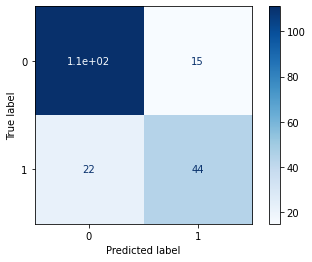

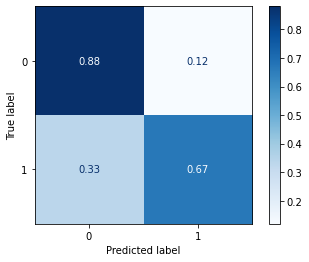

In [ ]:
plot_confusion_matrix(logreg, X_test, y_test, cmap = plt.cm.Blues)
plot_confusion_matrix(logreg, X_test, y_test, cmap = plt.cm.Blues, normalize = 'true')

Sensibilidad del 67%, especificidad del 88%.

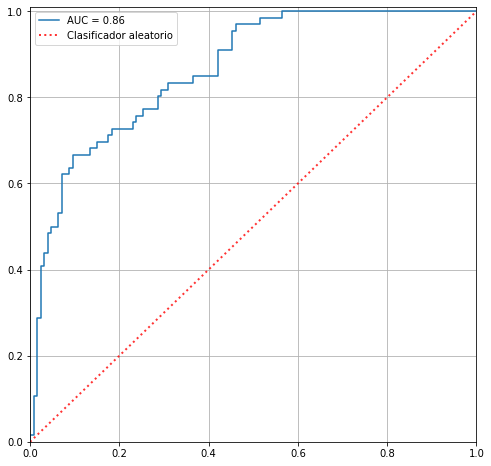

In [ ]:
plt.figure(figsize = (8,8)) #Porque la curva ROC debe ser cuadrada.
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label = "AUC = {:.2f}".format(auc))
plt.plot([0,1],[0,1], linestyle = ':', lw = 2, color = 'r', alpha = 0.8, label = "Clasificador aleatorio")
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend();
#plt.legend({"Clasificador aleatorio", "AUC = {:.2f}".format(auc)}, loc = 4);

Sensibilidad = eje y, especificidad = 1 - eje x

[-3.9695995237868886, array([0.08939495, 0.86942188])]


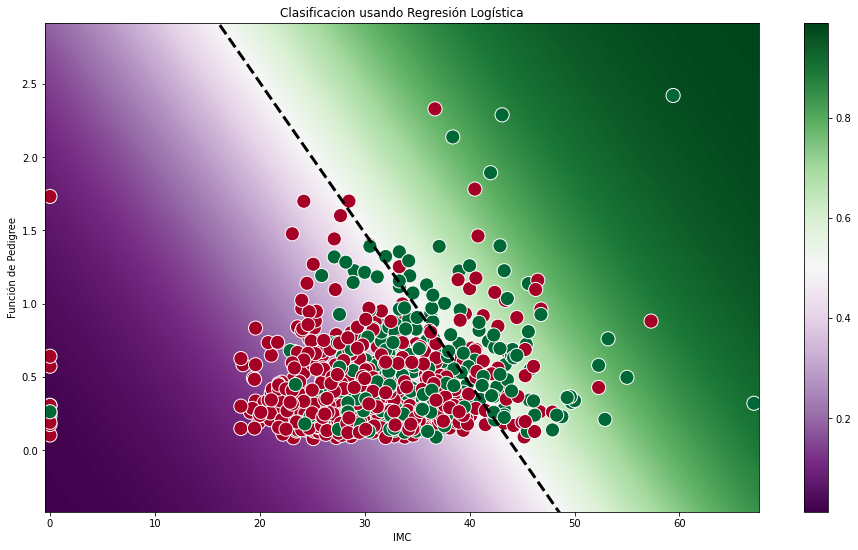

In [ ]:
#Para visualización.
X = pima[feature_cols].values
y = pima.label
h = 0.02
clf = LogisticRegression()
clf.fit(X[:,[5,6]],y) # Solo tomar dos caracteristicas para poder graficar
x_min, x_max = X[:,5].min() - 0.5, X[:,5].max() + 0.5
y_min, y_max = X[:,6].min() - 0.5, X[:,6].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) 

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)
plt.figure(figsize = [16,9])
plt.pcolormesh(xx, yy, Z, cmap = 'PRGn')

plt.colorbar();

#Presentar datos originales.
plt.scatter(X[:,5],X[:,6], c = y, cmap = 'RdYlGn', edgecolor = 'w', s = 200);

plt.xlim([xx.min(), xx.max()])
plt.ylim([yy.min(), yy.max()])

plt.title('Clasificacion usando Regresión Logística');
plt.xlabel("IMC");
plt.ylabel("Función de Pedigree");

#Graficar frontera de desición. Modelo.
parameters = [clf.intercept_[0], clf.coef_[0]]
print(parameters) # Se le está dando mayor ponderación al pedigree respecto al imc.

x_values = [np.min(X[:,5]) - 0.5, np.max(X[:,5]) + 0.5]
y_values = -(parameters[0] + np.dot(x_values, parameters[1][0]))/parameters[1][1]

plt.plot(x_values, y_values, lw = 3, color = 'k', linestyle = '--')


# Entrenar nuevo modelo KNN para comparar.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7) #Para comparar objetivamente hacer validación cruzada
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
y_pred_probaknn = knn.predict_proba(X_test)[:,1] 

0.781926406926407


Text(0, 0.5, 'tpr')

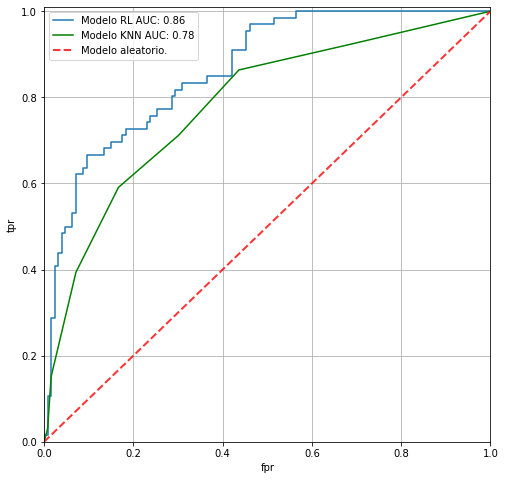

In [ ]:
plt.figure(figsize = (8,8))
fprknn , tprknn, _ = roc_curve(y_test, y_pred_probaknn)
aucknn = roc_auc_score(y_test, y_pred_probaknn)
print(aucknn)

plt.plot(fpr, tpr, label = "Modelo RL AUC: {:.2f}".format(auc))
plt.plot(fprknn, tprknn, label = "Modelo KNN AUC: {:.2f}".format(aucknn), color = 'g')
plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = "Modelo aleatorio.");
plt.grid()
plt.xlim([0,1])
plt.ylim([0,1.01])
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')